# Machine Vision Lab 7 - In Lab Task
> Name - Ojas Patil
>
> Register Number - 21BAI1106

## Object Segmentation

In [8]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('sunflower.png')

In [ ]:
cv2.imshow('grayscale sunflower :)',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

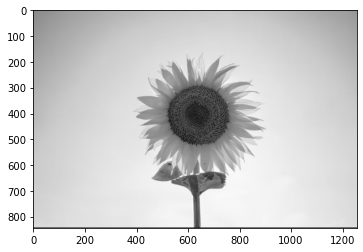

In [ ]:
plt.imshow(img)

### segmenting the sunflower using global thresholding

In [ ]:
_, segmented_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [ ]:
cv2.imshow('segmented sunflower :)',segmented_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

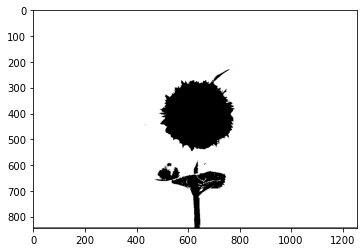

In [ ]:
plt.imshow(segmented_img)

## Sobel operator

(-0.5, 291.5, 284.5, -0.5)

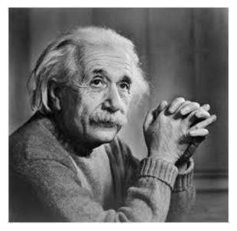

In [ ]:
img = cv2.imread('albert.jpg')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis('off')

In [ ]:
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

### Horizontal direction

(-0.5, 291.5, 284.5, -0.5)

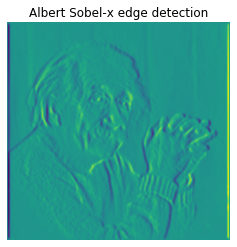

In [ ]:
plt.imshow(sobelx)
plt.title("Albert Sobel-x edge detection")
plt.axis('off')

### Vertical direction

Text(0.5, 1.0, 'Albert Sobel-y edge detection')

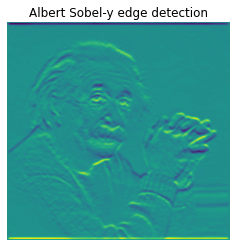

In [ ]:
plt.imshow(sobely)
plt.axis('off')
plt.title("Albert Sobel-y edge detection")

## Edge detection using Sobel

In [ ]:
def sobel_edge_detector(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel operator
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Apply a threshold to identify edges
    threshold = 50
    edges = magnitude > threshold

    return edges

In [ ]:
image_path = 'bicycle.png'
edge_image = sobel_edge_detector(image_path)

# Display the original and edge-detected images
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

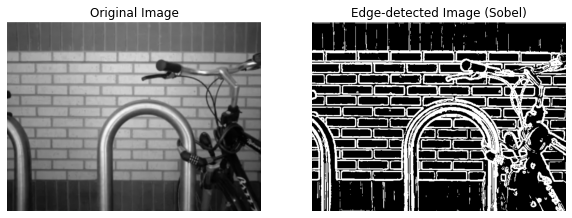

In [ ]:
# Plotting the images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

# Edge-detected Image
plt.subplot(1, 2, 2)
plt.imshow(edge_image, cmap='gray')
plt.title('Edge-detected Image (Sobel)')
plt.axis('off')

# Display the images
plt.show()

## Canny Algorithm
Steps:-
- Gray scale conversion
- Noise reduction
- Gradient calculation
- Non-maximum suppression
- Double Thresholding

### Gray Scaler Conversion

(-0.5, 601.5, 446.5, -0.5)

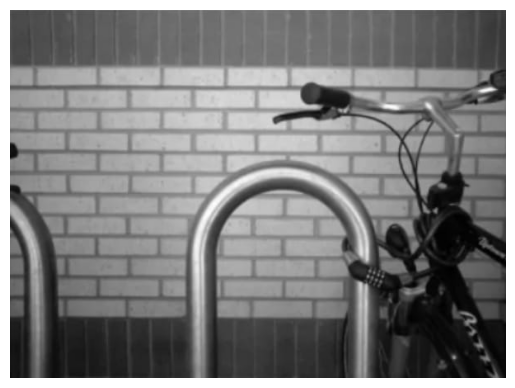

In [9]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/bicycle.jpg')
plt.imshow(img)
plt.axis('off')

(-0.5, 601.5, 446.5, -0.5)

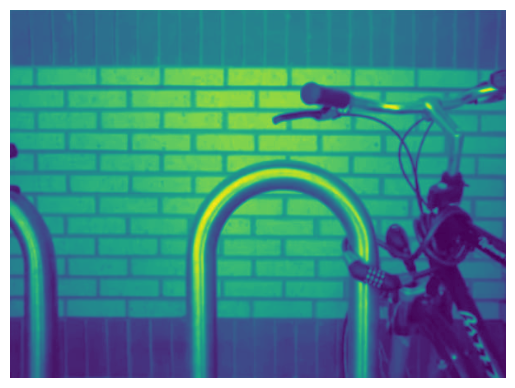

In [10]:
# Gray scale conversion using the formula:
# Gray = 0.299*R + 0.587*G + 0.114*B
imgGray = np.dot(img[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

plt.imshow(imgGray)
plt.axis('off')

### Noise reduction

(-0.5, 601.5, 446.5, -0.5)

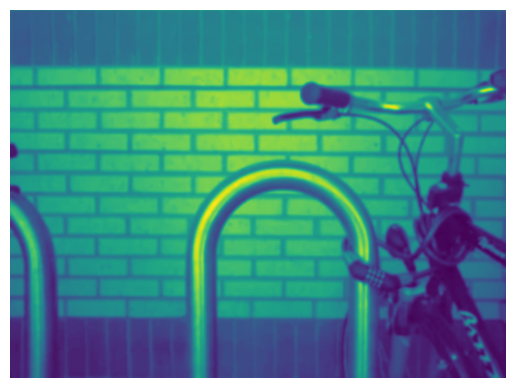

In [11]:
# Gaussian kernel for blurring (manual implementation)
def gaussian_kernel(size, sigma=1):
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

kernel = gaussian_kernel(13, sigma=1)
imgBlur = cv2.filter2D(imgGray, -1, kernel)
plt.imshow(imgBlur)
plt.axis('off')

### Gradient Calculation

In [12]:
# Sobel filters to find intensity gradient
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Sobel operator for x direction
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Sobel operator for y direction

Ix = cv2.filter2D(imgBlur, -1, Kx)  # Gradient in x direction
Iy = cv2.filter2D(imgBlur, -1, Ky)  # Gradient in y direction

# Calculate gradient magnitude and direction
gradient_magnitude = np.sqrt(Ix**2 + Iy**2)
gradient_direction = np.arctan2(Iy, Ix)

### Non-max Supression

In [14]:
# Non-Maximum Suppression
def non_max_suppression(magnitude, direction):
    M, N = magnitude.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255

                # 0 degrees
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = magnitude[i, j+1]
                    r = magnitude[i, j-1]
                # 45 degrees
                elif (22.5 <= angle[i,j] < 67.5):
                    q = magnitude[i+1, j-1]
                    r = magnitude[i-1, j+1]
                # 90 degrees
                elif (67.5 <= angle[i,j] < 112.5):
                    q = magnitude[i+1, j]
                    r = magnitude[i-1, j]
                # 135 degrees
                elif (112.5 <= angle[i,j] < 157.5):
                    q = magnitude[i-1, j-1]
                    r = magnitude[i+1, j+1]

                if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                    Z[i,j] = magnitude[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass

    return Z

(-0.5, 601.5, 446.5, -0.5)

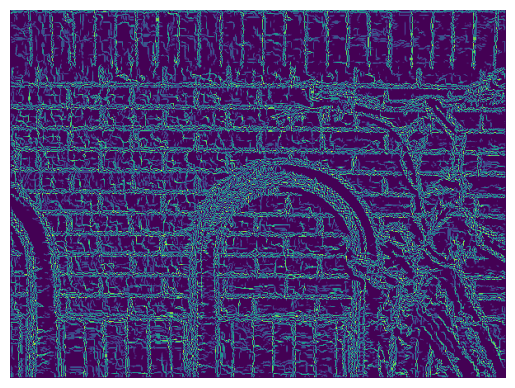

In [16]:
imgSuppressed = non_max_suppression(gradient_magnitude, gradient_direction)
plt.imshow(imgSuppressed)
plt.axis('off')

### Double Thresholding

In [27]:
# Double Thresholding
def double_threshold(img, low_threshold, high_threshold):
    strong = 255
    weak = 75

    M, N = img.shape
    res = np.zeros((M, N), dtype=np.int32)

    strong_i, strong_j = np.where(img >= high_threshold)
    zeros_i, zeros_j = np.where(img < low_threshold)

    weak_i, weak_j = np.where((img <= high_threshold) & (img >= low_threshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return res

imgCanny = double_threshold(imgSuppressed, 50, 150)

(-0.5, 601.5, 446.5, -0.5)

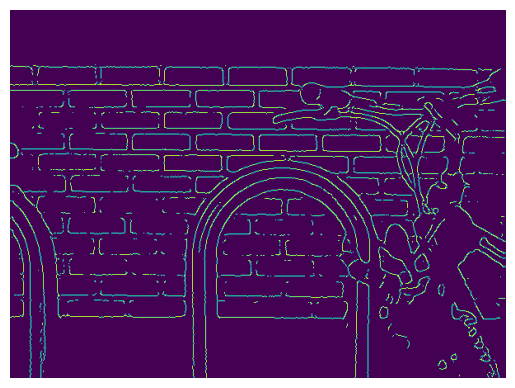

In [31]:
plt.imshow(imgCanny)
plt.axis('off')

## Using pre-defined function

In [28]:
import cv2

img = cv2.imread('/content/bicycle.jpg')

# to grayscale
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# guassian blur
imgBlur = cv2.GaussianBlur(imgGray, (13, 13), 0)

# canny edge detection
imgCanny = cv2.Canny(imgBlur, 50, 50)

(-0.5, 601.5, 446.5, -0.5)

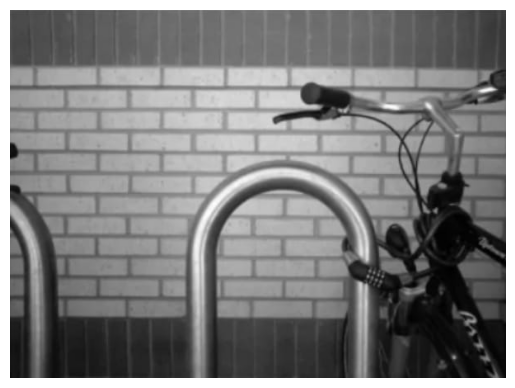

In [29]:
plt.imshow(img)
plt.axis('off')

(-0.5, 601.5, 446.5, -0.5)

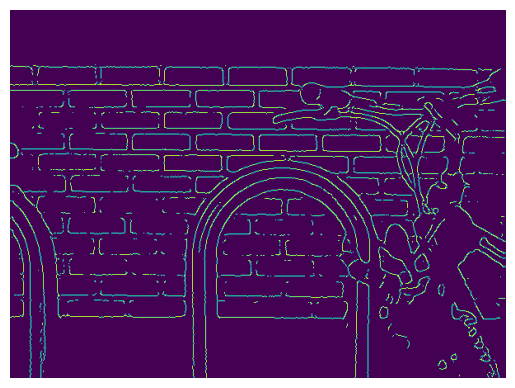

In [30]:
plt.imshow(imgCanny)
plt.axis('off')